# Gradient Descent Algorithms

## 1. Gradient Descent 1d 

In [4]:
import numpy as np
import random 
random.seed(10)

# Function we want to find the minimum of
def f(x):
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3

# Derivative of function
def df(x):
    return 4*x**3 + 21*x**2 + 10*x - 17



In [5]:
def GD1(eta, iters):
    x_steps1 = []
    x_steps2 = []
    # 1.Random starting point
    x_rand1 = 2#random.uniform(-4,2)
    x_rand2 = -6
    for i in range(iters):
        # 2.Step in direction of negative gradient
        x_steps1.append(x_rand1)
        x_rand1 -= eta*df(x_rand1)
        
        x_steps2.append(x_rand2)
        x_rand2 -= eta*df(x_rand2)
        # 3.Repeat 
    return x_steps1, x_steps2


In [10]:
x_steps1, x_steps2 = GD1(0.001, 100)

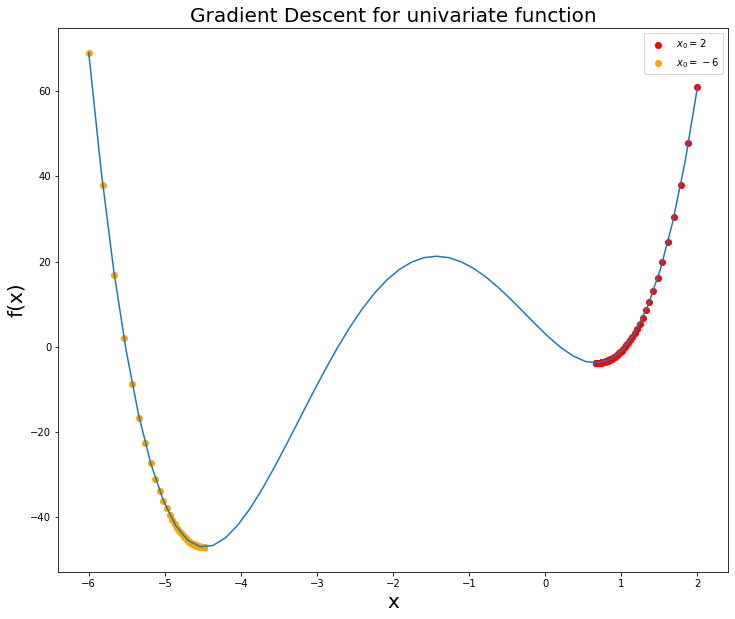

In [12]:
import matplotlib.pyplot as plt

#Function Plot
x = np.linspace(-6, 2, 50)
y = f(x)
fig,ax = plt.subplots(figsize=(12,10))
ax.plot(x,y)
ax.set_title('Gradient Descent for univariate function', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)
ax.scatter(x_steps1,f(np.array(x_steps1)), c='r', label= r'$ x_0 = 2$')
ax.scatter(x_steps2, f(np.array(x_steps2)), c='orange', label= r'$ x_0 = -6$')
ax.legend()
plt.show()
fig.savefig('./images/GD_1d.png')

## 1.2. Gradient Descent 1d with Momentum  While Loop

In [50]:
# Gradient Descent Algorithm momentum
alpha = 0.8
eta = 0.001 #Learning rate 
threshold = 0.001 # threshold of derivative
x_steps = []

# 1.Random starting point
x_rand = 1.8 #random.uniform(-4,2)
while abs(df(x_rand)) >= threshold:
    x_steps.append(x_rand)
    # 2. Compute the momentum
    delta_x = x_rand - x_steps[-2] if len(x_steps)>1 else 0
    # 3.Step in direction of negative gradient
    x_rand -= eta*df(x_rand) - alpha*delta_x
    # 4.Repeat until exit condition True



AttributeError: 'numpy.ndarray' object has no attribute 'legend'

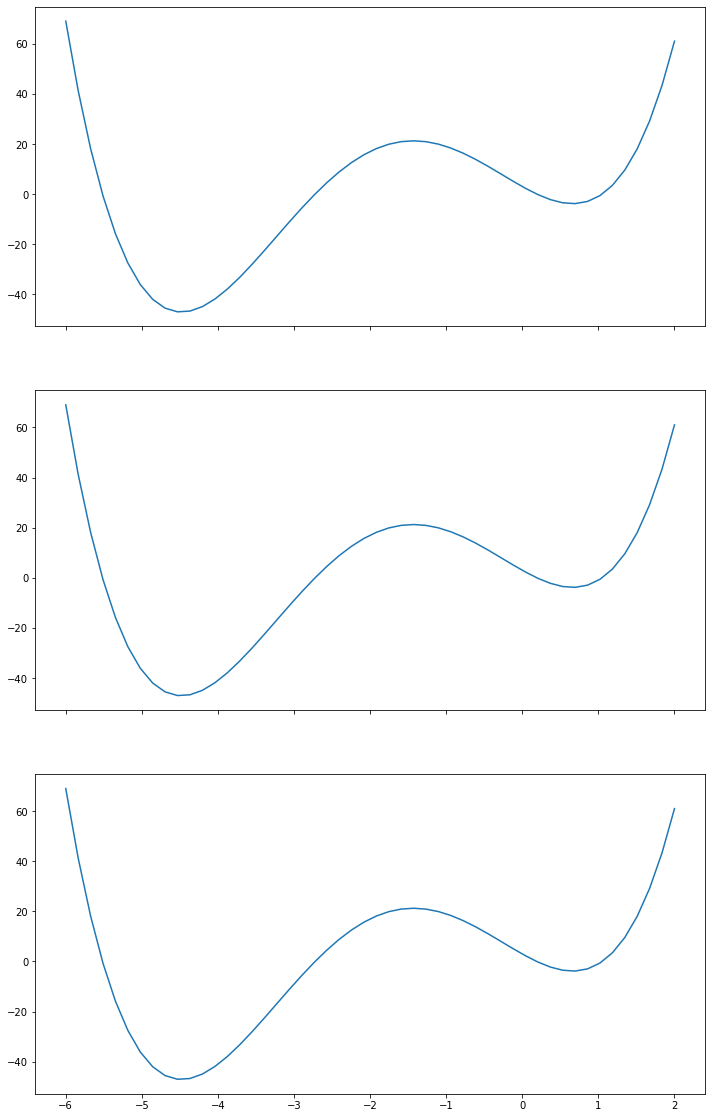

In [55]:
import matplotlib.pyplot as plt

#Function Plot
x = np.linspace(-6, 2, 50)
y = f(x)
fig,ax = plt.subplots(3, figsize=(12,20), sharex=True)
ax[0].plot(x,y, label=r'$f(x)=x^4- 2x^2$')
ax[1].plot(x,y, label=r'$f(x)=x^4- 2x^2$')
ax[2].plot(x,y, label=r'$f(x)=x^4- 2x^2$')

ax.legend()

momentum = [ 0.8, 0.85, 0.9, 0.95, 0.99]
ax.scatter(x_steps, f(np.array(x_steps)), c='r')
plt.show()
fig.savefig('./images/GD.png')
#print(f'min f(x): {f(x_steps[-1]):.2f} \t x_min: {x_rand:.2f} ') 

## 2. Gradient Decent 2d

In [122]:
def loss( w1 , w2, input_vector):
    return input_vector[0]*w1**2 + input_vector[1]*w2**2

def dloss_w1(w1 , w2, input_vector):
    return 2*input_vector[0]*w1

def dloss_w2(w1,w2,input_vector):
    return 2*input_vector[1]*w2

def cost(w1,w2,input_set):
    cost_aux = 0
    for input_vector in input_set:
        loss_tmp = loss(w1,w2,input_vector)
        cost_aux+=loss_tmp
    return cost_aux/len(input_set)

def dcost_w1(w1,w2,input_set):
    dcostx=0
    for input_vector in input_set:
        dcostx += dloss_w1(w1,w2,input_vector)
    return dcostx/len(input_set)

def dcost_w2(w1,w2,input_set):
    dcosty = 0
    for input_vector in input_set:
        dcosty += dloss_w2(w1,w2,input_vector)
    return dcosty/len(input_set)


In [126]:
def GD2(eta, iters, input_set):
    w1_steps = []
    w2_steps = []
    # 1.Random starting point
    w1_rand = random.uniform(-10,10)
    w2_rand = random.uniform(-10,10)
    for i in range(iters):
        w1_steps.append(w1_rand)
        w2_steps.append(w2_rand)
        # 2.Step in direction of negative gradient
        w1_rand -= eta* dcost_w1(w1_rand,w2_rand,input_set)
        w2_rand -= eta* dcost_w2(w1_rand,w2_rand,input_set)
    return w1_steps,w2_steps


In [127]:
# Input Vector
input_set = [ [1,-5], [-2,4], [2,3] ]
eta = 0.01
iters = 10000

w1_steps_gd ,w2_steps_gd = GD2(eta, iters, input_set)

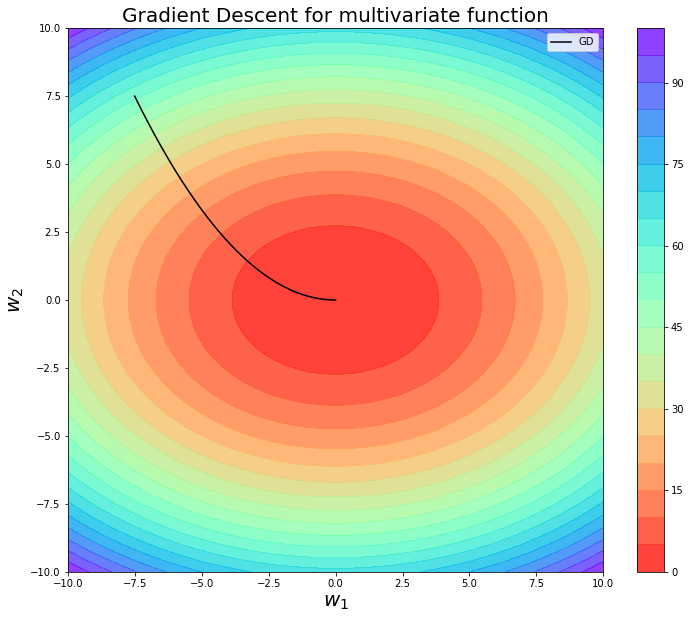

In [164]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
x,y= np.meshgrid(x,y)
z = cost(x,y,input_set)

fig,ax = plt.subplots(figsize=(12,10))
contour = ax.contourf(x,y,z, cmap='rainbow_r', levels= 20, alpha =0.8)
cbar = fig.colorbar(contour)

ax.plot(w1_steps_gd, w2_steps_gd, c = 'k', label='GD')
ax.set_ylabel(r'$w_2$',fontsize=20)
ax.set_xlabel(r'$w_1$',fontsize=20)
ax.legend()
ax.set_title('Gradient Descent for multivariate function', fontsize=20)
fig.savefig('GD_3d.png')

## 3. Stochastic GD [without replacement]

In [13]:
def loss( w1 , w2, input_vector):
    return input_vector[0]*w1**2 + input_vector[1]*w2**2

def dloss_w1(w1 , w2,input_vector):
    return 2*input_vector[0]*w1

def dloss_w2(w1,w2,input_vector):
    return 2*input_vector[1]*w2

def cost(w1,w2,input_set):
    cost_aux = 0
    for element in input_set:
        loss_tmp = loss(w1,w2,element[0],element[1])
        cost_aux+=loss_tmp
    return cost_aux/len(input_set)

def dcost_w1(w1,w2,input_set):
    dcostx=0
    for input_vector in input_set:
        dcostx += dloss_w1(w1,w2,input_vector)
    return dcostx/len(input_set)

def dcost_w2(w1,w2,input_set):
    dcosty = 0
    for input_vector in input_set:
        dcosty += dloss_w2(w1,w2,input_vector)
    return dcosty/len(input_set)


In [51]:
def SGD1(eta,iters,input_set):
    w1_steps = []
    w2_steps = []
    # 1.Random starting point
    w1_rand = -7.5 #random.uniform(-4,2)
    w2_rand = 7.5
    for i in range(iters):
        # option 1: run through the data with replacement
        input_vector = random.choice(input_set)
        w1_steps.append(w1_rand)
        w2_steps.append(w2_rand)
        w1_rand -= eta* dloss_w1(w1_rand,w2_rand,input_vector)
        w2_rand -= eta* dloss_w2(w1_rand,w2_rand,input_vector)
    return w1_steps,w2_steps
    

In [54]:
eta = 0.01 #Learning rate 
iters = 1000
input_set =  [ [1,-5], [-2,4], [2,3] ]
w1_steps_sgd1,w2_steps_sgd1 = SGD1(eta,iters,input_set)

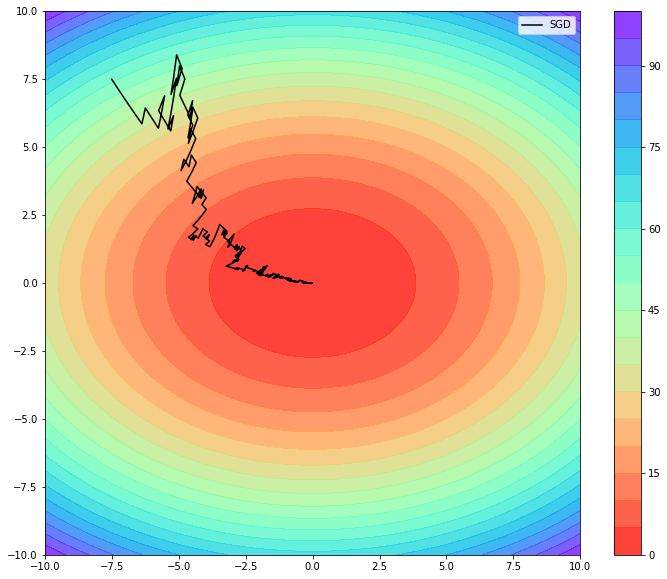

In [56]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-10, 10, 50)
y = np.linspace(-10,10, 50)
x,y= np.meshgrid(x,y)

z = cost(x,y,input_set)

fig,ax = plt.subplots(figsize=(12,10))
contour = ax.contourf(x,y,z, cmap='rainbow_r', levels= 20, alpha =0.8)
cbar = fig.colorbar(contour)
ax.plot(w1_steps_sgd1, w2_steps_sgd1, c = 'k', label='SGD')
ax.legend()


## 4. SGD Version 2 [without replacement]

In [79]:
def loss( w1 , w2, input_vector):
    return input_vector[0]*w1**2 + input_vector[1]*w2**2

def dloss_w1(w1 , w2,input_vector):
    return 2*input_vector[0]*w1

def dloss_w2(w1,w2,input_vector):
    return 2*input_vector[1]*w2

def cost(w1,w2,input_set):
    cost_aux = 0
    for element in input_set:
        loss_tmp = loss(w1,w2,element[0],element[1])
        cost_aux+=loss_tmp
    return cost_aux/len(input_set)

def dcost_w1(w1,w2,input_set):
    dcostx=0
    for input_vector in input_set:
        dcostx += dloss_w1(w1,w2,input_vector)
    return dcostx/len(input_set)

def dcost_w2(w1,w2,input_set):
    dcosty = 0
    for input_vector in input_set:
        dcosty += dloss_w2(w1,w2,input_vector)
    return dcosty/len(input_set)


In [57]:
def SGD2(eta,iters, input_set):
    w1_steps = []
    w2_steps = []
    # 1.Random starting point
    w1_rand = -7.5 #random.uniform(-4,2)
    w2_rand = 7.5
    for i in range(iters):
        # option 2: run through the data without replacement
        random.shuffle(input_set)
        for input_vector in input_set:
            w1_steps.append(w1_rand)
            w2_steps.append(w2_rand)
            w1_rand -= eta* dloss_w1(w1_rand,w2_rand,input_vector)
            w2_rand -= eta* dloss_w2(w1_rand,w2_rand,input_vector)
    return w1_steps,w2_steps

In [59]:
# Stochastic Gradient Descent
input_set = [ [1,-5], [-2,4], [2,3] ]

eta = 0.01 #Learning rate 
threshold = 0.01 # threshold of derivative
iters = 1000
w1_steps_sgd2, w2_steps_sgd2 = SGD2(eta,iters, input_set)

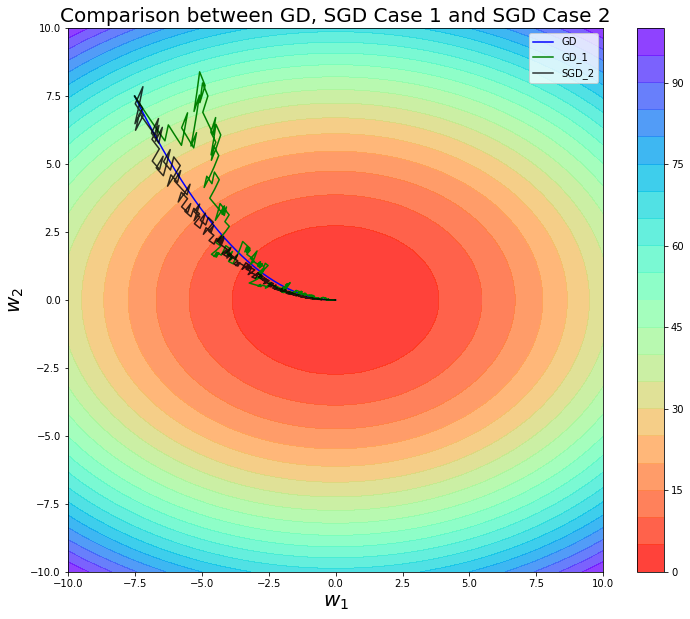

In [167]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 


x = np.linspace(-10, 10, 50)
y = np.linspace(-10,10, 50)
x,y= np.meshgrid(x,y)
z = cost(x,y,input_set)

fig,ax = plt.subplots(figsize=(12,10))
contour = ax.contourf(x,y,z, cmap='rainbow_r', levels= 20, alpha =0.8)
cbar = fig.colorbar(contour)
ax.plot(w1_steps_gd, w2_steps_gd, c = 'b', label='GD')
ax.plot(w1_steps_sgd1, w2_steps_sgd1, c = 'g', label='GD_1')
ax.plot(w1_steps_sgd2, w2_steps_sgd2, c = 'k', alpha=0.8,label='SGD_2')

ax.set_xlabel(r'$w_1$', size=20)
ax.set_ylabel(r'$w_2$', size=20)
ax.set_title('Comparison between GD, SGD Case 1 and SGD Case 2', fontsize=20)

ax.legend()
fig.savefig('SGD_op2.png')

## Reference

- Sebastian Ruder, *An overview of gradient descent optimizationalgorithms*, 2017, available [here](https://arxiv.org/pdf/1609.04747.pdf)